In [38]:
pip install scikit-learn

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple/
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
plt.rcParams["font.sans-serif"]=["SimHei"]
plt.rcParams["axes.unicode_minus"]=False

In [3]:
california = pd.read_excel("C:/Users/Akurum1/Desktop/复习课：回归-聚类-决策树/复习课：回归-聚类-决策树/复习-综合实验数据\California_Houses.xlsx")
california

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco
0,452600.0,8.3252,41,880,129,322,126,37.88,-122.23,9263.040773,556529.158342,735501.806984,67432.517001,21250.213767
1,358500.0,8.3014,21,7099,1106,2401,1138,37.86,-122.22,10225.733072,554279.850069,733236.884360,65049.908574,20880.600400
2,352100.0,7.2574,52,1467,190,496,177,37.85,-122.24,8259.085109,554610.717069,733525.682937,64867.289833,18811.487450
3,341300.0,5.6431,52,1274,235,558,219,37.85,-122.25,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568
4,342200.0,3.8462,52,1627,280,565,259,37.85,-122.25,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,78100.0,1.5603,25,1665,374,845,330,39.48,-121.09,162031.481121,654530.186299,830631.543047,248510.058162,222619.890417
20636,77100.0,2.5568,18,697,150,356,114,39.49,-121.21,160445.433537,659747.068444,836245.915229,246849.888948,218314.424634
20637,92300.0,1.7000,17,2254,485,1007,433,39.43,-121.22,153754.341182,654042.214020,830699.573163,240172.220489,212097.936232
20638,84700.0,1.8672,18,1860,409,741,349,39.43,-121.32,152005.022239,657698.007703,834672.461887,238193.865909,207923.199166


In [6]:
# 可以查看数据集的一些信息
X = california.drop(columns='Median_House_Value')  # 特征数据
y = california['Median_House_Value']  # 目标数据（房价相关数值）

In [7]:
X

,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco
0,8.3252,41,880,129,322,126,37.88,-122.23,9263.040773,556529.158342,735501.806984,67432.517001,21250.213767
1,8.3014,21,7099,1106,2401,1138,37.86,-122.22,10225.733072,554279.850069,733236.884360,65049.908574,20880.600400
2,7.2574,52,1467,190,496,177,37.85,-122.24,8259.085109,554610.717069,733525.682937,64867.289833,18811.487450
3,5.6431,52,1274,235,558,219,37.85,-122.25,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568
4,3.8462,52,1627,280,565,259,37.85,-122.25,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,1.5603,25,1665,374,845,330,39.48,-121.09,162031.481121,654530.186299,830631.543047,248510.058162,222619.890417
20636,2.5568,18,697,150,356,114,39.49,-121.21,160445.433537,659747.068444,836245.915229,246849.888948,218314.424634
20637,1.7000,17,2254,485,1007,433,39.43,-121.22,153754.341182,654042.214020,830699.573163,240172.220489,212097.936232
20638,1.8672,18,1860,409,741,349,39.43,-121.32,152005.022239,657698.007703,834672.461887,238193.865909,207923.199166


In [8]:
y

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: Median_House_Value, Length: 20640, dtype: float64

<Axes: >

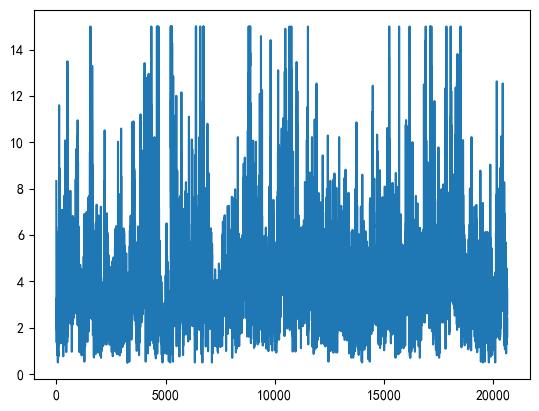

In [12]:
california["Median_Income"].plot()

<Axes: >

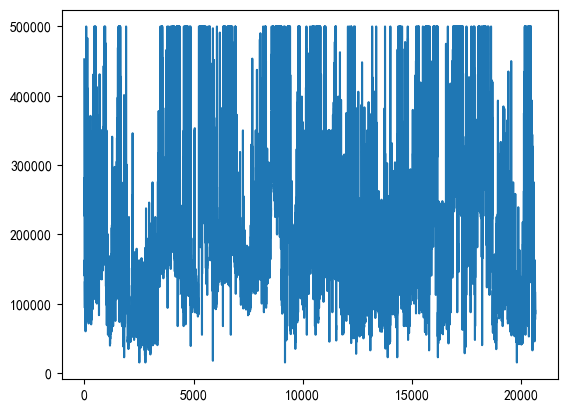

In [13]:
california["Median_House_Value"].plot()

Text(0.5, 1.0, 'Median_House_Value的箱线图')

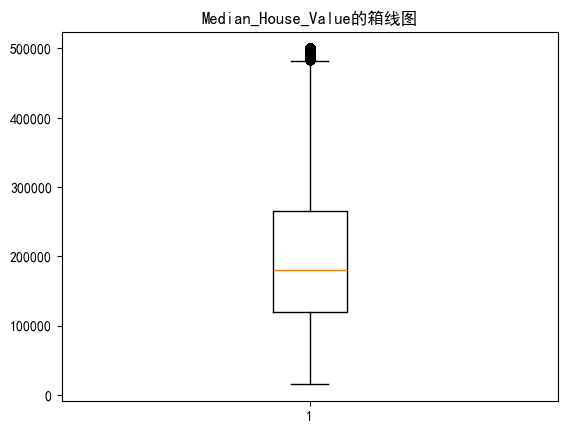

In [14]:
plt.boxplot(california["Median_House_Value"])
plt.title("Median_House_Value的箱线图")

Text(0.5, 1.0, '收入和房价的散点图')

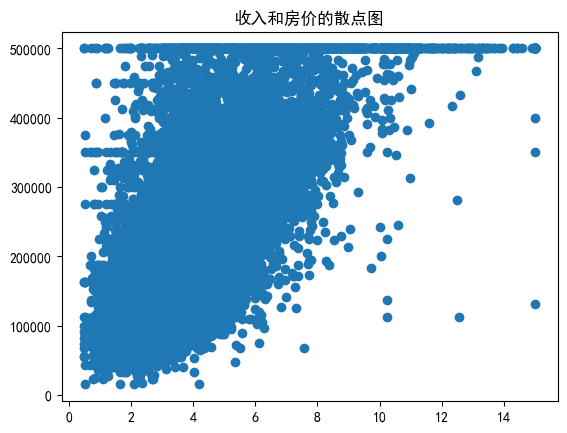

In [15]:
plt.scatter(california["Median_Income"],california["Median_House_Value"])
plt.title("收入和房价的散点图")

In [16]:
california.columns

Index(['Median_House_Value', 'Median_Income', 'Median_Age', 'Tot_Rooms',
       'Tot_Bedrooms', 'Population', 'Households', 'Latitude', 'Longitude',
       'Distance_to_coast', 'Distance_to_LA', 'Distance_to_SanDiego',
       'Distance_to_SanJose', 'Distance_to_SanFrancisco'],
      dtype='object')

In [17]:
print("特征数据形状:", X.shape)
print("目标数据形状:", y.shape)


特征数据形状: (20640, 13)
目标数据形状: (20640,)


In [18]:
california.head()

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco
0,452600.0,8.3252,41,880,129,322,126,37.88,-122.23,9263.040773,556529.158342,735501.806984,67432.517001,21250.213767
1,358500.0,8.3014,21,7099,1106,2401,1138,37.86,-122.22,10225.733072,554279.850069,733236.884360,65049.908574,20880.600400
2,352100.0,7.2574,52,1467,190,496,177,37.85,-122.24,8259.085109,554610.717069,733525.682937,64867.289833,18811.487450
3,341300.0,5.6431,52,1274,235,558,219,37.85,-122.25,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568
4,342200.0,3.8462,52,1627,280,565,259,37.85,-122.25,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568


In [19]:
california.tail()

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco
20635,78100.0,1.5603,25,1665,374,845,330,39.48,-121.09,162031.481121,654530.186299,830631.543047,248510.058162,222619.890417
20636,77100.0,2.5568,18,697,150,356,114,39.49,-121.21,160445.433537,659747.068444,836245.915229,246849.888948,218314.424634
20637,92300.0,1.7000,17,2254,485,1007,433,39.43,-121.22,153754.341182,654042.214020,830699.573163,240172.220489,212097.936232
20638,84700.0,1.8672,18,1860,409,741,349,39.43,-121.32,152005.022239,657698.007703,834672.461887,238193.865909,207923.199166
20639,89400.0,2.3886,16,2785,616,1387,530,39.37,-121.24,146866.196892,648723.337126,825569.179028,233282.769063,205473.376575


In [21]:
california.describe()

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,2.064000e+04,2.064000e+04,20640.000000,20640.000000
mean,206855.816909,3.870671,28.639486,2635.763081,537.898014,1425.476744,499.539680,35.631861,-119.569704,40509.264883,2.694220e+05,3.981649e+05,349187.551219,386688.422291
std,115395.615874,1.899822,12.585558,2181.615252,421.247906,1132.462122,382.329753,2.135952,2.003532,49140.039160,2.477324e+05,2.894006e+05,217149.875026,250122.192316
min,14999.000000,0.499900,1.000000,2.000000,1.000000,3.000000,1.000000,32.540000,-124.350000,120.676447,4.205891e+02,4.849180e+02,569.448118,456.141313
25%,119600.000000,2.563400,18.000000,1447.750000,295.000000,787.000000,280.000000,33.930000,-121.800000,9079.756762,3.211125e+04,1.594264e+05,113119.928682,117395.477505
50%,179700.000000,3.534800,29.000000,2127.000000,435.000000,1166.000000,409.000000,34.260000,-118.490000,20522.019101,1.736675e+05,2.147398e+05,459758.877000,526546.661701
75%,264725.000000,4.743250,37.000000,3148.000000,647.000000,1725.000000,605.000000,37.710000,-118.010000,49830.414479,5.271562e+05,7.057954e+05,516946.490963,584552.007907
max,500001.000000,15.000100,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,41.950000,-114.310000,333804.686371,1.018260e+06,1.196919e+06,836762.678210,903627.663298


In [22]:
california.describe().T

,count,mean,std,min,25%,50%,75%,max
Median_House_Value,20640.0,206855.816909,115395.615874,14999.000000,119600.000000,179700.000000,264725.000000,5.000010e+05
Median_Income,20640.0,3.870671,1.899822,0.499900,2.563400,3.534800,4.743250,1.500010e+01
Median_Age,20640.0,28.639486,12.585558,1.000000,18.000000,29.000000,37.000000,5.200000e+01
Tot_Rooms,20640.0,2635.763081,2181.615252,2.000000,1447.750000,2127.000000,3148.000000,3.932000e+04
Tot_Bedrooms,20640.0,537.898014,421.247906,1.000000,295.000000,435.000000,647.000000,6.445000e+03
Population,20640.0,1425.476744,1132.462122,3.000000,787.000000,1166.000000,1725.000000,3.568200e+04
Households,20640.0,499.539680,382.329753,1.000000,280.000000,409.000000,605.000000,6.082000e+03
Latitude,20640.0,35.631861,2.135952,32.540000,33.930000,34.260000,37.710000,4.195000e+01
Longitude,20640.0,-119.569704,2.003532,-124.350000,-121.800000,-118.490000,-118.010000,-1.143100e+02
Distance_to_coast,20640.0,40509.264883,49140.039160,120.676447,9079.756762,20522.019101,49830.414479,3.338047e+05


In [24]:
california["Longitude"].skew()

-0.2978012079524362

In [25]:
california["Longitude"].kurt()

-1.3301523662288144

In [26]:
california.index

RangeIndex(start=0, stop=20640, step=1)

In [27]:
california.columns

Index(['Median_House_Value', 'Median_Income', 'Median_Age', 'Tot_Rooms',
       'Tot_Bedrooms', 'Population', 'Households', 'Latitude', 'Longitude',
       'Distance_to_coast', 'Distance_to_LA', 'Distance_to_SanDiego',
       'Distance_to_SanJose', 'Distance_to_SanFrancisco'],
      dtype='object')

<Axes: >

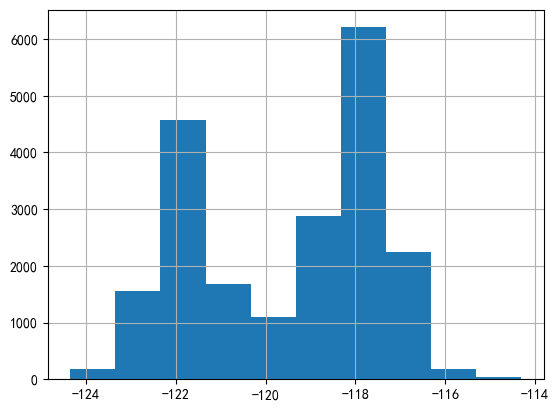

In [28]:
california["Longitude"].hist()

{'whiskers': [<matplotlib.lines.Line2D at 0x24cd3152350>,
 'caps': [<matplotlib.lines.Line2D at 0x24cd3153510>,
 'boxes': [<matplotlib.lines.Line2D at 0x24cd30ee590>],
 'medians': [<matplotlib.lines.Line2D at 0x24cd3158310>],
 'fliers': [<matplotlib.lines.Line2D at 0x24cd3158f10>],
 'means': []}

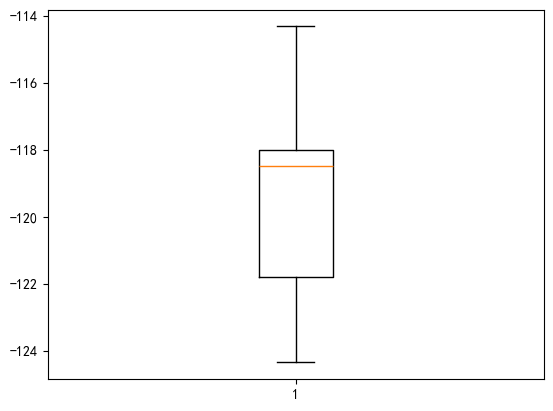

In [30]:
plt.boxplot(california['Longitude'])

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [39]:
# 提取自变量和因变量
X = california.drop(columns='Median_House_Value')  # 特征数据
y = california['Median_House_Value']  # 目标数据(房价相关数值)

In [40]:
# 划分训练集和测试集，这里测试集占比设为0.2（可根据实际需求调整）
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
X_train


,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco
14196,3.2596,33,3126,627,2300,623,32.71,-117.03,12116.208072,187011.810759,12280.841509,678476.213531,746477.057923
8267,3.8125,49,3382,787,1314,756,33.77,-118.16,2155.281728,32319.244177,149572.305235,520697.455568,588673.823266
17445,4.1563,4,1897,331,915,336,34.66,-120.48,13455.146557,216117.671544,375504.548482,323507.586182,387965.070983
14265,1.9425,36,1421,367,1418,355,32.69,-117.11,5214.687038,184461.172514,5571.282372,675484.355295,743459.721900
2271,3.5542,43,2382,431,874,380,36.78,-119.80,176663.234590,334484.232437,512157.659745,195724.414620,257705.081869
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,6.3700,35,1330,201,658,217,33.78,-117.96,12864.492584,40019.707560,139727.044811,531756.235514,599783.704103
11964,3.0500,33,3084,570,1753,449,34.02,-117.43,62967.287930,75062.702751,147161.673571,546147.803990,613968.851604
5390,2.9344,36,2101,569,1756,527,34.03,-118.38,11715.072797,12801.292905,184842.756194,485477.345833,553467.812127
860,5.7192,15,3575,597,1777,559,37.58,-121.96,13858.996090,515808.055643,694699.028968,27824.577268,46750.315127


In [42]:
X_test

,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco
20046,1.6812,25,1505,367,1392,359,36.06,-119.01,181940.136332,233893.527814,408714.566871,293550.331117,358894.994747
3024,2.5313,30,2943,697,1565,584,35.14,-119.46,81381.242991,164389.284615,342981.620308,327407.281369,395422.046998
15663,3.4801,52,3830,1142,1310,963,37.80,-122.44,540.917690,562389.565893,740893.792262,70653.801257,2993.525022
20484,5.7376,17,3051,505,1705,495,34.28,-118.72,29434.721926,50615.002818,226155.681336,444127.558426,512081.027489
9814,3.7250,34,2351,440,1063,428,36.62,-121.93,5392.746480,439632.446326,615200.335195,79625.503189,135780.250676
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15362,4.6050,16,3165,482,1351,452,33.36,-117.22,24081.413554,122030.015839,71849.060836,612231.585579,680255.167658
16623,2.7266,28,4323,886,1650,705,35.36,-120.83,2813.649389,277544.667246,447975.376415,239402.473133,304126.254108
18086,9.2298,25,4111,538,1585,568,37.31,-122.05,18798.400884,499318.145490,677430.786588,14166.591625,61577.677586
2144,2.7850,36,2507,466,1227,474,36.77,-119.76,178814.018255,331963.904640,509472.117933,199454.946254,261393.268512


In [43]:
y_train

14196    103000.0
8267     382100.0
17445    172600.0
14265     93400.0
2271      96500.0
           ...   
11284    229200.0
11964     97800.0
5390     222100.0
860      283500.0
15795    325000.0
Name: Median_House_Value, Length: 16512, dtype: float64

In [44]:
# 创建线性回归模型对象
model = LinearRegression()

In [45]:
# 训练模型
model.fit(X_train, y_train)

LinearRegression()

In [50]:
# 打印截距
print("截距:", model.intercept_)
# 打印自变量'median_income' 的系数
print("自变量'Median_Income' 的系数:", model.coef_[0])

截距: -1678454.8750864351
自变量'Median_Income' 的系数: 39316.29113025134


In [52]:
# 使用训练好的模型进行预测
y_pred = model.predict(X_test) 

In [49]:
# 评估模型性能
# 计算均方误差（MSE）
mse = mean_squared_error(y_test, y_pred)
# 计算决定系数（R²）
r2 = r2_score(y_test, y_pred)

print("均方误差（MSE）:", mse)
print("决定系数（R²）:", r2)

均方误差（MSE）: 4809839606.897374
决定系数（R²）: 0.6329512627917027


In [53]:
print(type(y_test))

<class 'pandas.core.series.Series'>


In [55]:
y_test1=pd.DataFrame(y_test)

In [56]:
y_test1

,Median_House_Value
20046,47700.0
3024,45800.0
15663,500001.0
20484,218600.0
9814,278000.0
...,...
15362,263300.0
16623,266800.0
18086,500001.0
2144,72300.0


In [54]:
print(type(X_test))

<class 'pandas.core.frame.DataFrame'>


In [57]:
X_test

,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco
20046,1.6812,25,1505,367,1392,359,36.06,-119.01,181940.136332,233893.527814,408714.566871,293550.331117,358894.994747
3024,2.5313,30,2943,697,1565,584,35.14,-119.46,81381.242991,164389.284615,342981.620308,327407.281369,395422.046998
15663,3.4801,52,3830,1142,1310,963,37.80,-122.44,540.917690,562389.565893,740893.792262,70653.801257,2993.525022
20484,5.7376,17,3051,505,1705,495,34.28,-118.72,29434.721926,50615.002818,226155.681336,444127.558426,512081.027489
9814,3.7250,34,2351,440,1063,428,36.62,-121.93,5392.746480,439632.446326,615200.335195,79625.503189,135780.250676
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15362,4.6050,16,3165,482,1351,452,33.36,-117.22,24081.413554,122030.015839,71849.060836,612231.585579,680255.167658
16623,2.7266,28,4323,886,1650,705,35.36,-120.83,2813.649389,277544.667246,447975.376415,239402.473133,304126.254108
18086,9.2298,25,4111,538,1585,568,37.31,-122.05,18798.400884,499318.145490,677430.786588,14166.591625,61577.677586
2144,2.7850,36,2507,466,1227,474,36.77,-119.76,178814.018255,331963.904640,509472.117933,199454.946254,261393.268512


Text(0.5, 1.0, '收入和房价的散点图')

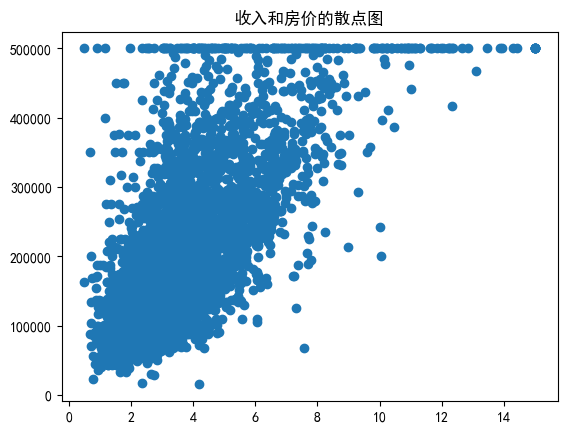

In [58]:
plt.scatter(X_test["Median_Income"],y_test1)
plt.title("收入和房价的散点图")

In [59]:
print(type(y_pred))

<class 'numpy.ndarray'>


In [62]:
y_pred1=pd.DataFrame(y_pred)

In [63]:
y_pred1

,0
0,35648.637309
1,174922.032316
2,333310.659755
3,281053.211492
4,254590.933025
...,...
4123,202094.912861
4124,247720.796898
4125,424554.609412
4126,102940.540385


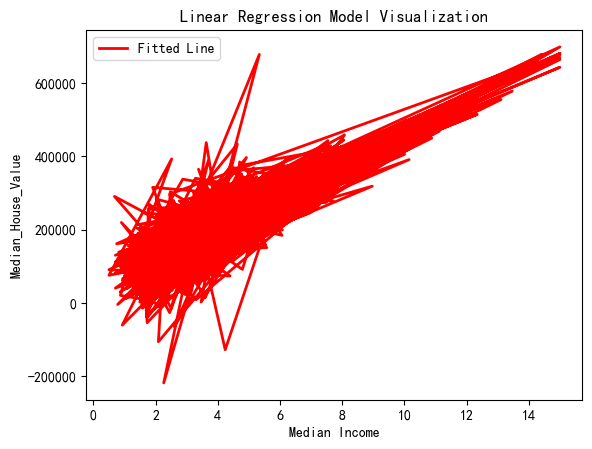

In [64]:
# 绘制拟合直线，用预测值绘制
plt.plot(X_test["Median_Income"], y_pred1, color='red', linewidth=2, label='Fitted Line')
plt.xlabel('Median Income')
plt.ylabel('Median_House_Value')
plt.title('Linear Regression Model Visualization')
plt.legend()
plt.show()

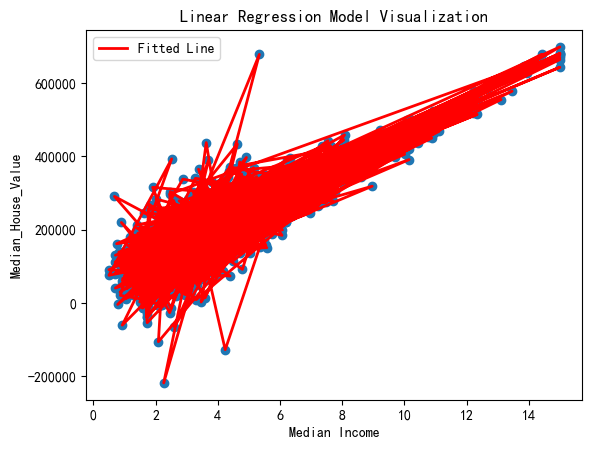

In [66]:
plt.scatter(X_test["Median_Income"],y_test1)
# 绘制拟合直线，用预测值绘制
plt.plot(X_test["Median_Income"], y_pred1, color='red', linewidth=2, label='Fitted Line')
plt.xlabel('Median Income')
plt.ylabel('Median_House_Value')
plt.title('Linear Regression Model Visualization')
plt.legend()
plt.show()

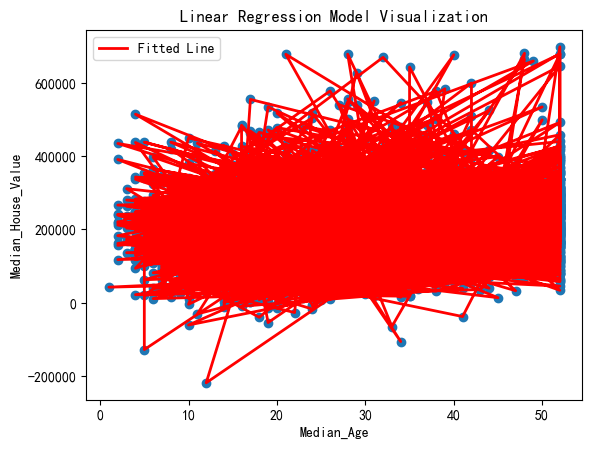

In [67]:
plt.scatter(X_test["Median_Age"],y_test1)
# 绘制拟合直线，用预测值绘制
plt.plot(X_test["Median_Age"], y_pred1, color='red', linewidth=2, label='Fitted Line')
plt.xlabel('Median_Age')
plt.ylabel('Median_House_Value')
plt.title('Linear Regression Model Visualization')
plt.legend()
plt.show()

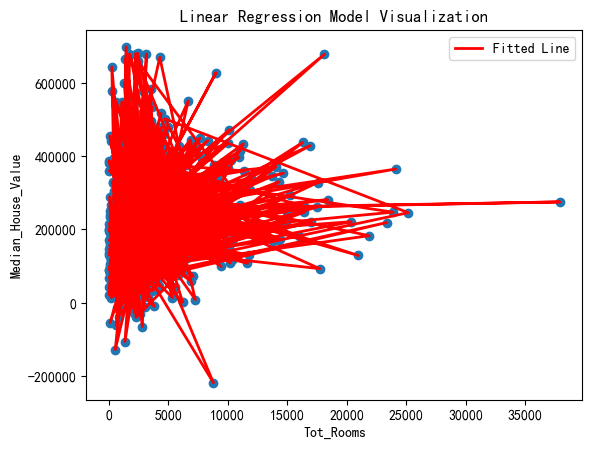

In [68]:
plt.scatter(X_test["Tot_Rooms"],y_test1)
# 绘制拟合直线，用预测值绘制
plt.plot(X_test["Tot_Rooms"], y_pred1, color='red', linewidth=2, label='Fitted Line')
plt.xlabel('Tot_Rooms')
plt.ylabel('Median_House_Value')
plt.title('Linear Regression Model Visualization')
plt.legend()
plt.show()

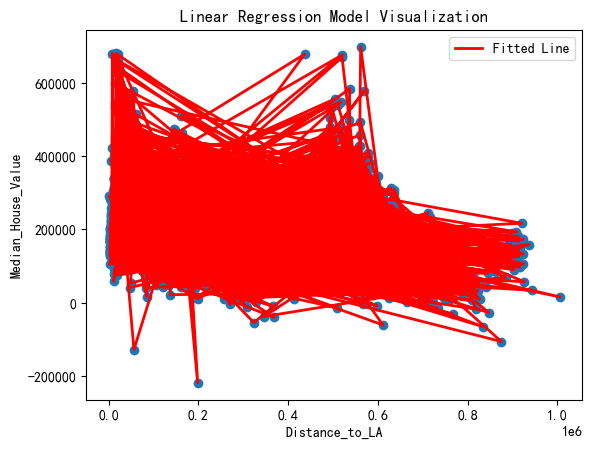

In [69]:
plt.scatter(X_test["Distance_to_LA"],y_test1)
# 绘制拟合直线，用预测值绘制
plt.plot(X_test["Distance_to_LA"], y_pred1, color='red', linewidth=2, label='Fitted Line')
plt.xlabel('Distance_to_LA')
plt.ylabel('Median_House_Value')
plt.title('Linear Regression Model Visualization')
plt.legend()
plt.show()

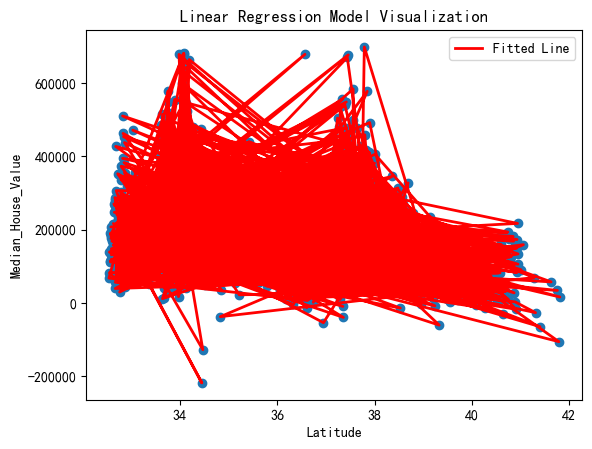

In [70]:
plt.scatter(X_test["Latitude"],y_test1)
# 绘制拟合直线，用预测值绘制
plt.plot(X_test["Latitude"], y_pred1, color='red', linewidth=2, label='Fitted Line')
plt.xlabel('Latitude')
plt.ylabel('Median_House_Value')
plt.title('Linear Regression Model Visualization')
plt.legend()
plt.show()